In [36]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

In [37]:
N = 2
M = 5

i = 0
j = 1

min_J_V_ratio = -2
max_J_V_ratio = 2

max_mu_value = 1.5

resolution = 500


mu_values = np.linspace(0, max_mu_value, resolution)
J_V_ratio_values = np.linspace(min_J_V_ratio, max_J_V_ratio, resolution)
V_J_ratio_values = np.linspace(min_V_J_ratio, max_V_J_ratio, resolution)

energy_gap_cutoff = 0.1
energy_gap_cutoff_2 = 0.01
energy_gap_cutoff_3 = 0.001

In [38]:
mu_grid, J_V_ratio_grid = np.meshgrid(mu_values, J_V_ratio_values)
states, _ = enumerate_states(N, M)
sigma_grid = np.zeros_like(mu_grid)

V = -1

for idx1, mu in enumerate(mu_values):
    for idx2, J_V_ratio in enumerate(J_V_ratio_values):
        J = J_V_ratio * V
        
        H = construct_initial_hamiltonian(N, M, mu) + construct_hamiltonian(N, M, J, V)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
        ground_state_wavefunction = eigenvectors[0]
        
        sigma_grid[idx2,idx1] += [sigma_ij(i = i, j = j, ground_state_wavefunction = ground_state_wavefunction, states = states, N=N, M=M)/M]

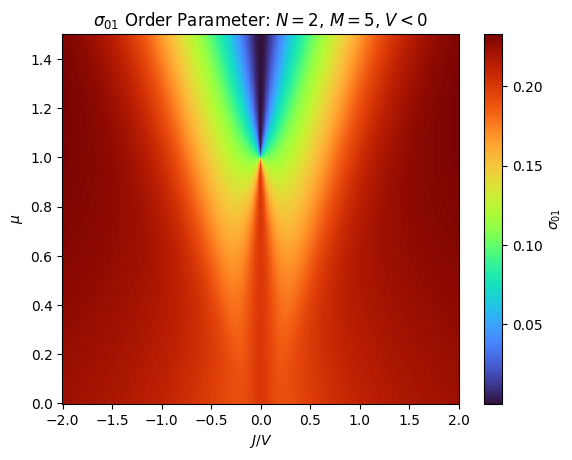

In [39]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, sigma_grid, shading='auto', cmap='turbo')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title("$\sigma_{01}$ Order Parameter:"+f" $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title("$\sigma_{01}$ Order Parameter:"+f" $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$\sigma_{01}$")

plt.show()